In [101]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat

In [102]:
X = loadmat('./ex7_data/ex7data1.mat')['X']
# X = mat[:,0]
# y = mat[:,1]
# X.shape, y.shape
X.shape

(50, 2)

In [103]:
def data_display():
    plt.plot(X[:,0],X[:,1],'bo')

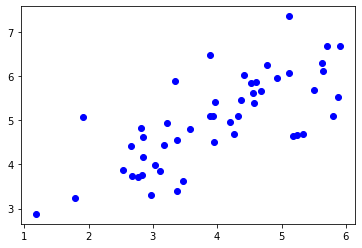

In [104]:
data_display()

In [105]:
a = np.array([[1,2,3],[1,2,3],[1,2,3]])
# for i in a:
#     print(i[2])
# b = np.zeros(3)
# np.append(b,2)
a[1,1]

2

In [106]:
type(float(X[:,0][0]))

float

In [107]:
c = np.zeros(10)

In [108]:
def min_centroid(xi, uj):
    distance = np.zeros(uj.shape[0])
    for j in range(uj.shape[0]):
            for i in range(len(xi)):
                distance[j]+=(xi[i]-uj[j,i])**2
    min_loc = np.argmin(distance)
    return min_loc

numpy.argmax(...) 获得括号里ndarray里的最大元素的索引

numpy.argmin(...) 获得括号里ndarray里的最小元素的索引

In [109]:
def find_closest_centroids(X, uj):
    centr_classfi = []
    for x in X:
       centr_classfi.append(min_centroid(x,uj))
    return centr_classfi


In [110]:
dfb = pd.DataFrame(X)
dfb.insert(dfb.shape[1],'class',1)
dfb.iloc[:,0:2].head()

,0,1
0,3.381563,3.389113
1,4.527875,5.854178
2,2.655682,4.411995
3,2.765235,3.715414
4,2.846560,4.175506


In [111]:
def plotData(X, centres, centr_classfi, loc=1):
    # assert type(X)==pd.DataFrame, 'X in plotDate must is pd.DataFrame'
    colors = ['b','g','gold','darkorange','salmon','olivedrab', 
              'maroon', 'navy', 'sienna', 'tomato', 'lightgray', 'gainsboro'
             'coral', 'aliceblue', 'dimgray', 'mintcream', 'mintcream']
    X_df = pd.DataFrame(X)
    X_df.insert(X_df.shape[1],'class',centr_classfi)

    num_centr = set(centr_classfi)
    for i in num_centr:
        xx = X_df[X_df['class'] == i].values[:,:2]
        plt.scatter(xx[:,0],xx[:,1],c=colors[i], label='Cluster %d'%i)
    plt.legend(loc=loc)
    # print(uj)
    for j in range(centres[0].shape[0]):
        xx,yy=[],[]
        for centre in centres:
            xx.append(centre[j,0:1])
            yy.append(centre[j,1:2])
        plt.plot(xx,yy,'rx--',markersize=10)
    # plt.plot(centres[len(centres)-1],'kx',markersize=10)
    plt.show()

In [112]:

def init_clutisd(K, X):
    #随机初始化 簇中心点
    randown_loc = np.random.choice(X.shape[0],K, replace=False)
    array = [X[loc] for loc in randown_loc]
    uj = np.array(array)
    return uj

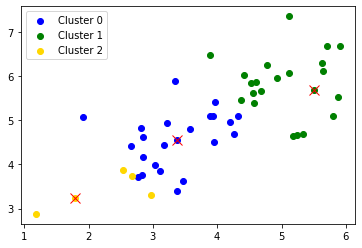

In [113]:
K=3
centres=[]
centres.append(init_clutisd(K, X))
centr_classfi = find_closest_centroids(X, centres[0])
plotData(X, centres, centr_classfi,loc=2)
# centres
# for centre in centres:
#     print(centre)

In [114]:
def computeMeans(X, centr_classfi, K):
    # K 分类数
    u = []
    df = pd.DataFrame(X)
    assert len(centr_classfi) == X.shape[0], 'centr_:{}, X : {}'.format(len(centr_classfi),X.shape[0])
    df.insert(df.shape[1],'class',centr_classfi)
    for k in range(K):
        u.append(df[df['class'] == k].mean(0).values) #每列求均值
    # print(u)
    return np.array(u)


In [115]:
centres

[array([[3.37542687, 4.56537852],
        [5.50027665, 5.67948113],
        [1.79709714, 3.24753885]])]

In [116]:
def K_means(X, K):
    centres=[]
    centres.append(init_clutisd(K, X))
    centr_classfi = find_closest_centroids(X, centres[0])
    # plotData(X, centres, centr_classfi,loc=loc)

    for i in range(3):
        centres.append(computeMeans(X, centr_classfi, K)[:,:X.shape[1]])
        centr_classfi = find_closest_centroids(X, centres[i+1])

    return centr_classfi,centres
    # plotData(X, centres,centr_classfi,loc=loc)

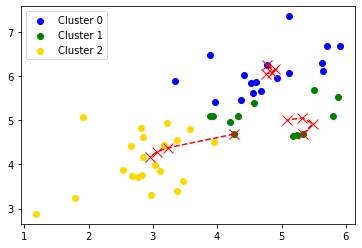

In [117]:
# plotData(X, centres, centr_classfi,loc=2)
centr_classfi,centres = K_means(X,3)
plotData(X, centres,centr_classfi,loc=2)

# 数据集 2

In [118]:
mat2 = loadmat("./ex7_data/ex7data2.mat")
X2 = mat2['X']

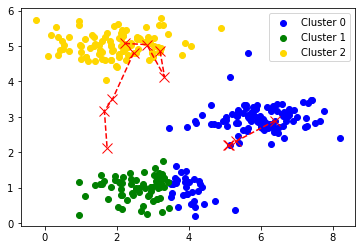

In [119]:
centr_classfi,centres = K_means(X2,3)
plotData(X2, centres,centr_classfi,loc=1)

# Image compression with K-means


In [120]:
mat3 = loadmat('./ex7_data/bird_small.mat')
A = mat3['A']

In [121]:
X3 = A.reshape(-1,3)
cs, c = K_means(X3,16)

([], <a list of 0 Text major ticklabel objects>)

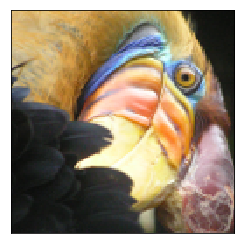

In [125]:
pre_image = X3
cs = np.array(cs)
c_ = c[3]
for i in range(16):
    index_cs = np.argwhere(cs == i).flatten()
    pre_image[index_cs] = c_[i]

([], <a list of 0 Text major ticklabel objects>)

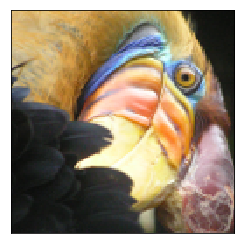

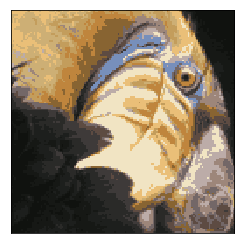

In [130]:
pre_image = pre_image.reshape(128,128,3)
plt.matshow(A)
plt.yticks([])
plt.xticks([])
plt.matshow(pre_image)
plt.yticks([])
plt.xticks([])
